In [1]:
import pandas as pd
import numpy as np
# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error
# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from utils.data_preparation import data_preprocessor
from utils.result_analysis import print_accuracy, metrics_calculate, calculate_defect_identified
from training_model.models import *

## Evaluation

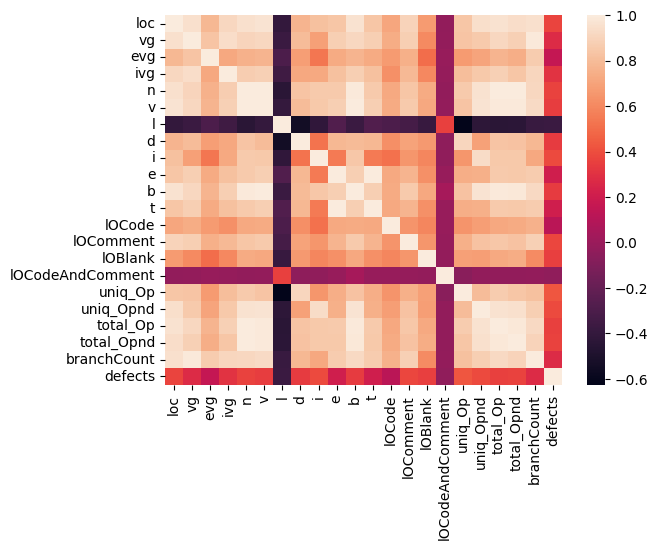

In [3]:
data = 'datasets/cm1.csv'
original_data , original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = data_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]

In [4]:
full_dataset_x = pd.concat([x_train, x_val, x_test], axis=0)
full_dataset_y = pd.concat([y_train, y_val, y_test], axis=0)

data_name = "CM1"
print(f"Dataset name: {data_name}")
defect_cnt = full_dataset_y.value_counts()[1]
total = len(full_dataset_y)
density = defect_cnt / total
print(f"Defect count: {defect_cnt}")
print(f"Total count: {total}")
print(f"Density: {round(density*100, 2)}")

Dataset name: CM1
Defect count: 417
Total count: 866
Density: 48.15


/var/folders/35/sp1m9lqn6wzdmpd_dvn379300000gn/T/ipykernel_21171/1405445448.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  defect_cnt = full_dataset_y.value_counts()[1]


#### ANN result

In [5]:
nn_clf = NN(*all_data)
nn_val_result, nn_test_result = print_accuracy(model, nn_clf, cnn_clf, x_val, x_test, y_val, y_test)

Epoch 1/50
74/74 [==============================] - 0s 589us/step - loss: 1098.6350 - accuracy: 0.5545
Epoch 2/50
74/74 [==============================] - 0s 509us/step - loss: 101.9030 - accuracy: 0.5899
Epoch 3/50
74/74 [==============================] - 0s 486us/step - loss: 83.4150 - accuracy: 0.5995
Epoch 4/50
74/74 [==============================] - 0s 479us/step - loss: 90.4149 - accuracy: 0.5899
Epoch 5/50
74/74 [==============================] - 0s 481us/step - loss: 68.7206 - accuracy: 0.5681
Epoch 6/50
74/74 [==============================] - 0s 519us/step - loss: 82.2376 - accuracy: 0.5627
Epoch 7/50
74/74 [==============================] - 0s 491us/step - loss: 84.8026 - accuracy: 0.4973
Epoch 8/50
74/74 [==============================] - 0s 498us/step - loss: 79.6099 - accuracy: 0.5518
Epoch 9/50
74/74 [==============================] - 0s 496us/step - loss: 87.3062 - accuracy: 0.4891
Epoch 10/50
74/74 [==============================] - 0s 482us/step - loss: 50.3869 - acc

TypeError: print_accuracy() missing 6 required positional arguments: 'nn_clf', 'cnn_clf', 'x_val', 'x_test', 'y_val', and 'y_test'

In [ ]:
metrics_calculate('ANN', nn_val_result["val_actual"], nn_val_result["val_predict"])

In [ ]:
calculate_defect_identified(nn_clf,full_dataset_x, full_dataset_y)

#### CNN result

In [ ]:
cnn_clf = cnn(*all_data)
cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)

In [ ]:
metrics_calculate('CNN', cnn_val_result["val_actual"], cnn_val_result["val_predict"])

In [ ]:
calculate_defect_identified(cnn_clf,full_dataset_x, full_dataset_y)

#### XGBoost result

In [ ]:
xgboost_clf = XGBoost(*all_data)
xgboost_val_result, xgboost_test_result = print_accuracy(xgboost_clf)

In [ ]:
metrics_calculate('xgboost', xgboost_val_result["val_actual"], xgboost_val_result["val_predict"])

#### Defect Defected/Present(Full Dataset)

In [ ]:
calculate_defect_identified(xgboost_clf,full_dataset_x, full_dataset_y)

#### SVM result

In [ ]:
svm_clf = svm(*all_data)
svm_val_result, svm_test_result = print_accuracy(svm_clf)

In [ ]:
metrics_calculate('SVM', svm_val_result["val_actual"], svm_val_result["val_predict"])

In [ ]:
calculate_defect_identified(svm_clf,full_dataset_x, full_dataset_y)

#### Random forest result

In [ ]:
rf_clf = random_forest(*all_data)
rf_val_result, rf_test_result = print_accuracy(rf_clf)

In [ ]:
metrics_calculate('Random Forest', rf_val_result["val_actual"], rf_val_result["val_predict"])

In [ ]:
calculate_defect_identified(rf_clf,full_dataset_x, full_dataset_y)

#### Concat results

In [ ]:
new_val_set_x = pd.concat([svm_val_result['val_predict'],rf_val_result['val_predict'],nn_val_result['val_predict'],cnn_val_result['val_predict'],xgboost_val_result['val_predict']],axis=1)
new_val_set_x_matrix = new_val_set_x.values
new_val_set_y_matrix = svm_val_result['val_actual'].values

new_test_set_x = pd.concat([svm_test_result['test_predict'],rf_test_result['test_predict'],nn_test_result['test_predict'],cnn_test_result['test_predict'], xgboost_test_result['test_predict']],axis=1)
new_test_set_x_matrix = new_test_set_x.values
new_test_set_y_matrix = svm_test_result['test_actual'].values

#### Utility

In [ ]:
def send_classifiers_to_LR_file():
    return nn_clf ,cnn_clf, svm_clf, rf_clf, xgboost_clf

from sklearn.linear_model import LogisticRegression

def send_results_to_logistic_regression():
    clf = LogisticRegression(random_state=0)
    clf.fit(new_val_set_x_matrix , new_val_set_y_matrix)
    return clf, new_val_set_x_matrix

## Evaluation

In [ ]:
import pandas as pd

from sklearn.metrics import *
data = '/content/data/kc1.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = data_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]

nn_clf, cnn_clf, svm_clf, rf_clf, xgboost_clf = send_classifiers_to_LR_file()
log_reg_clf, new_val_set_x_matrix = send_results_to_logistic_regression()

prediction = log_reg_clf.predict(new_val_set_x_matrix)
print('Accuracy:',accuracy_score(y_val.values,prediction))